Universidad del valle de Guatemala <br>
Facultad de Ingeniería <br>
Departamento de ciencias de la Computación <br>
Inteligencia Artificial <br>

Grupo # 9 <br><br>
Christopher García 20541 <br>
Maria Isabel Solano 20504 <br>

### Laboratorio 8: Mixture Models y Segmentación de Clientes de Banco
Deberá construir un modelo basado en aprendizaje no supervisado para el dataset dado. Lo que se busca con este
modelo es poder segmentar a clientes de una entidad bancaria para poder así tomar decisiones a nivel comercial y
potenciar las operaciones de la empresa

### Task 1.1

In [26]:
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization
from quickda.clean_data import *
from sklearn.mixture import GaussianMixture

# Leer archivo csv
df = pd.read_csv('bank_transactions.csv' , low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [27]:
columns_to_drop = ["TransactionDate", "CustomerDOB", "CustomerID", "TransactionID", "TransactionDate", "TransactionTime"]
df = clean(df, method = 'dropcols', columns = columns_to_drop)

In [28]:
# Eliminar filas con valores NaN
df = df.dropna()

# Codificando variables categoricas

# Genero
df['CustGender'] = df['CustGender'].replace({'M': 0, 'F': 1, 'T': 2})

# Ubicacion

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['CustLocation'] = le.fit_transform(df['CustLocation'])

In [17]:
#Implementación aquí


In [9]:
df.head()

,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount (INR)
0,1,3567,17819.05,143207,25.0
1,0,3629,2270.69,141858,27999.0
2,1,5242,17874.44,142712,459.0
3,1,5242,866503.21,142714,2060.0
4,1,5631,6714.43,181156,1762.5


### Comparación con librerías

In [29]:
import pandas as pd
import numpy as np

# Seleccionar características relevantes
X = df[['CustAccountBalance', 'TransactionAmount (INR)']].values

# Normalizar características
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [30]:
from random import *
seed(10)
k = choices(range(0, X.shape[0]), k = 250000)
X_copy = np.array([X[val] for val in k])
X = X_copy
print(X.shape)

(250000, 2)


Puntaje de silueta: 0.5327057039996167


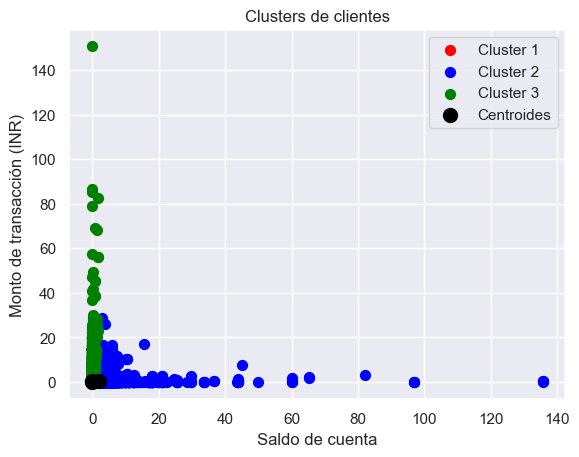

In [31]:
from sklearn.metrics import silhouette_score

# Ajustar modelo GMM
gmm = GaussianMixture(n_components=3)
gmm.fit(X)

# Predecir etiquetas de cluster
pred_y = gmm.predict(X)

# Calcular puntaje de silueta
silhouette_avg = silhouette_score(X, pred_y)
print("Puntaje de silueta:", silhouette_avg)

# Graficar clusters
plt.scatter(X[pred_y == 0, 0], X[pred_y == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X[pred_y == 1, 0], X[pred_y == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(X[pred_y == 2, 0], X[pred_y == 2, 1], s=50, c='green', label='Cluster 3')

# Graficar centroides
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], s=100, c='black', label='Centroides')

plt.title('Clusters de clientes')
plt.xlabel('Saldo de cuenta')
plt.ylabel('Monto de transacción (INR)')
plt.legend()
plt.show()

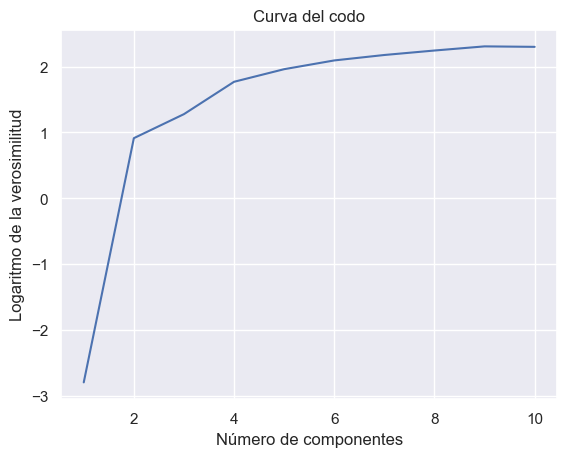

In [32]:
from sklearn.mixture import GaussianMixture

# Calcular logaritmo de verosimilitud para diferentes valores de n_components
log_likelihoods = []
for n_components in range(1, 11):
    gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=0)
    gmm.fit(X)
    log_likelihood = gmm.score(X)
    log_likelihoods.append(log_likelihood)

# Graficar curva del codo
plt.plot(range(1, 11), log_likelihoods)
plt.title('Curva del codo')
plt.xlabel('Número de componentes')
plt.ylabel('Logaritmo de la verosimilitud')
plt.show()

Score de la silueta: 0.5363516739629811


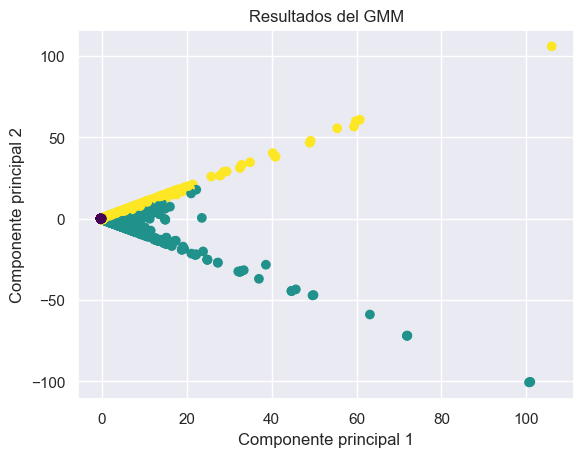

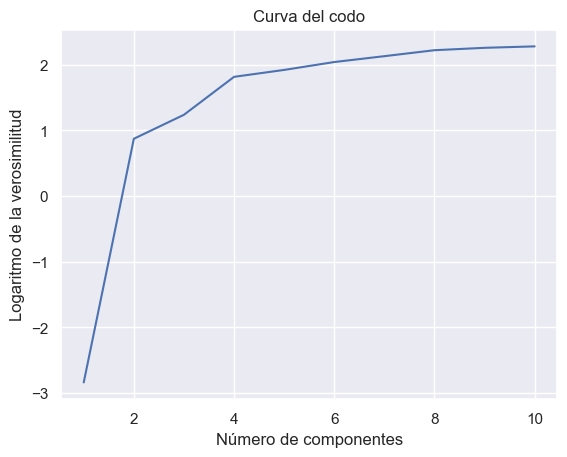

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# normalizar los datos
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# crear una instancia de PCA y ajustarla a los datos
pca = PCA(n_components=2)
pca.fit(X_norm)

# transformar los datos con PCA
X_pca = pca.transform(X_norm)

# crear una instancia de GMM y ajustarla a los datos
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=0)
gmm.fit(X_pca)

# asignar cada punto a su cluster correspondiente
y_gmm = gmm.predict(X_pca)

# calcular el score de la silueta
silhouette_avg = silhouette_score(X_pca, y_gmm)
print("Score de la silueta:", silhouette_avg)

# graficar los resultados del GMM
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_gmm, cmap='viridis')
plt.title('Resultados del GMM')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

# calcular logaritmo de verosimilitud para diferentes valores de n_components
log_likelihoods = []
for n_components in range(1, 11):
    gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=0)
    gmm.fit(X_pca)
    log_likelihood = gmm.score(X_pca)
    log_likelihoods.append(log_likelihood)

# graficar curva del codo
plt.plot(range(1, 11), log_likelihoods)
plt.title('Curva del codo')
plt.xlabel('Número de componentes')
plt.ylabel('Logaritmo de la verosimilitud')
plt.show()


### Conclusiones